## Green Belt - Lista de Exercícios 1  
### Gráficos de Tendência e de Frequência

3 - Uma Unidade de Pronto Atendimento passou a receber nas duas últimas semanas uma 
grande quantidade de reclamações relacionadas ao tempo de espera excessivo. Longos tempos 
de espera podem acarretar superlotação das unidades de saúde, sofrimento para os pacientes 
e acompanhantes e ambiente estressantes para toda equipe. A gerência dessa UPA, com o 
intuito de validar as reclamações recebidas e avaliar o cenário atual, coletou dados dos 
atendimentos das últimas quatro semanas e identificou quais atendimentos foram não 
conformes. 

Para definir se um atendimento está conforme ou não, seguiu-se o recomendado pela Agência 
Nacional de Saúde, a qual indica um tempo de espera adequado de acordo com o nível de 
classificação de risco do paciente: 

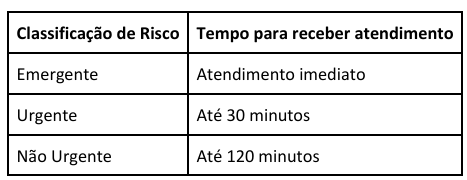

Os dados coletados estão disponíveis na planilha Green_Belt_FM2S_Lista_Exercícios_01, na 
aba 03.Atendimento_UPA.

### Importação dos dados

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/Ex01/base-de-dados/Atendimento_UPA.csv'
df = pd.read_csv(url)

df.head()

,Dia,Atendimento,Classificação de Risco,Tempo de Atendimento
0,1,1057,Não Urgente,Não conforme
1,1,1058,Não Urgente,Conforme
2,1,1059,Não Urgente,Conforme
3,1,1060,Não Urgente,Conforme
4,1,1061,Urgente,Conforme


### Responda:

a) Como o desempenho dos atendimentos por dia variou ao longo do tempo?

b) Quais fatores poderiam contribuir para a variação? Há causas especiais? 

c) Há diferenças em relação aos atrasos de acordo com cada classificação de risco? 